# Assignment No. - 4 : Simple Linear Regression
Q.1) Delivery_time -> Predict delivery time using sorting time
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:\data science assignments\delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.shape

(21, 2)

In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
corr_=df.corr()   
corr_    

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


The average Delivery Time and Sorting Time is 16.79 and 6.19 respectively

The minimum delivery time is 8.00 and maximum delivery time is 29.00

The minimum sorting time is 2.00 and maximum sorting time is 10.00

In [9]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

There are no null values in our data

In [10]:
df[df.duplicated()].shape

(0, 2)

In [11]:
df.skew() , df.kurtosis()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric

From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.

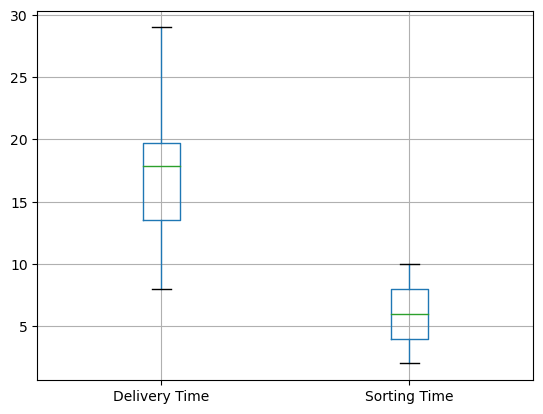

In [12]:
df.boxplot()
plt.show()

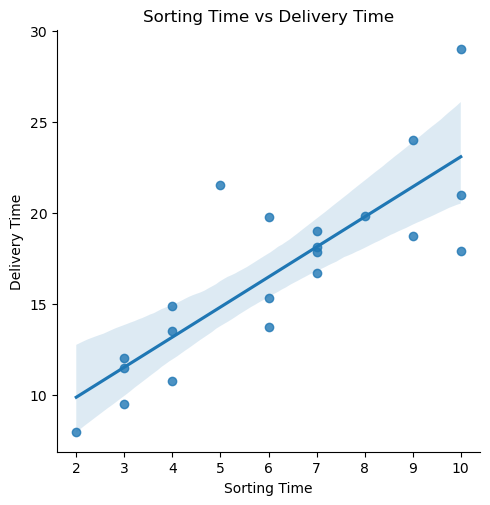

In [14]:
#to check linearity
sns.lmplot(x='Sorting Time',y='Delivery Time',data=df)
plt.title("Sorting Time vs Delivery Time")
plt.show()

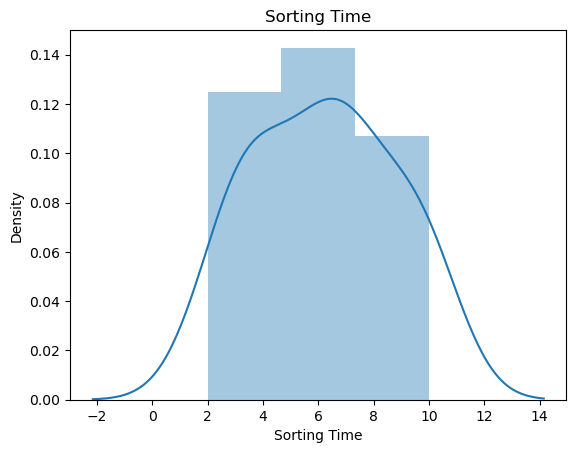

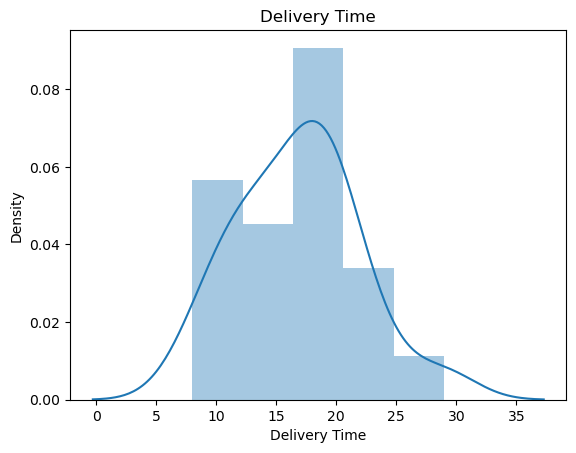

In [15]:
#checking Normality
sns.distplot(a=df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=df['Delivery Time'])
plt.title('Delivery Time')
plt.show()

From above plots we can say that,
for Sorting Time most of the data lie within the group 2 - 10
for Delivery Time most of the data lie within the group 10 - 20

# Model Building

In [16]:
df.columns=['Delivery','Sorting']       
df.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [18]:
#fitting model
linear_model=sm.ols("Delivery~Sorting",data=df).fit()

In [19]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        09:55:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [21]:
#t-values and p-values
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [22]:
#R squared values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model By square root Transformation

In [24]:
model1 = sm.ols('np.sqrt(Delivery)~np.sqrt(Sorting)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.sqrt(Delivery)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                        09:58:40   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model By cube root Transformation

In [25]:
model2 = sm.ols('np.cbrt(Delivery)~np.cbrt(Sorting)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.cbrt(Delivery)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                        09:59:27   Log-Likelihood:                 13.035
No. Observations:                  21   AIC:                            -22.07
Df Residuals:                      19   BIC:                            -19.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model By log Transformation

In [26]:
model3 = sm.ols('np.log(Delivery)~np.log(Sorting)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                        10:00:01   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model3.params

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64

In [28]:
#t-values and p-values
print(model3.tvalues ,'\n', model3.pvalues)

Intercept          13.085552
np.log(Sorting)     8.024484
dtype: float64 
 Intercept          5.921137e-11
np.log(Sorting)    1.601539e-07
dtype: float64


# Model Selection
After comparing the r-square values for both the models, we can say that the model3 (Log Transformation Model) is good for our data because of high value of r-square.

Now , we can use our best model for further calculation

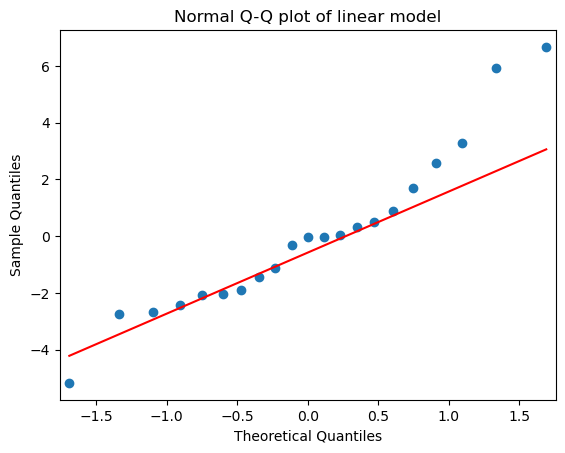

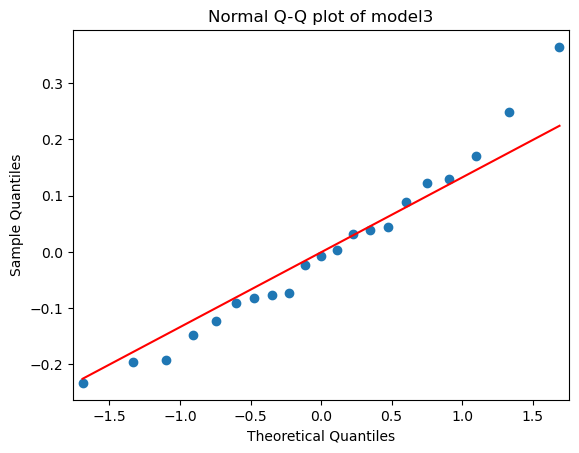

In [31]:
import statsmodels.api as sm
#Normal Q-Q Plot of Residuals for Normality For Transformed Model
sm.qqplot(linear_model.resid,line='q')
plt.title('Normal Q-Q plot of linear model')
plt.show()

#Normal Q-Q Plot of Residuals for Normality 
sm.qqplot(model3.resid,line='q')
plt.title('Normal Q-Q plot of model3')
plt.show()

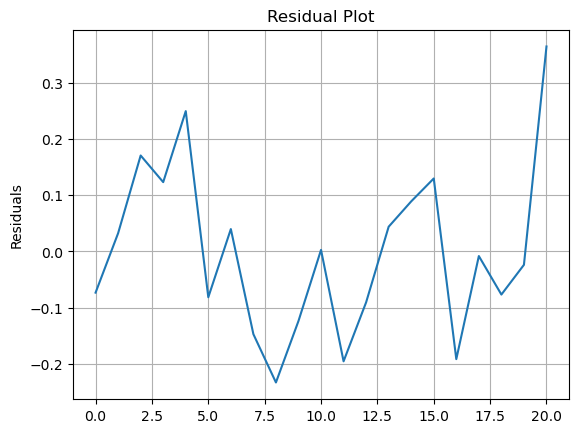

In [32]:
#Residual Plot of log transformed  model
plt.plot(model3.resid)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [38]:
pred_y=model3.predict()

In [36]:
pred_y

array([3.1178331 , 2.57032892, 2.81260338, 3.05487783, 3.1178331 ,
       2.81260338, 2.90471185, 2.39843246, 3.1178331 , 3.05487783,
       2.98449984, 2.57032892, 2.90471185, 2.39843246, 2.39843246,
       2.57032892, 2.81260338, 2.90471185, 2.15615801, 2.90471185,
       2.70366218])

In [39]:
predY= np.exp(pred_y)

In [40]:
predY

array([22.59736023, 13.07012281, 16.65321647, 21.2185932 , 22.59736023,
       16.65321647, 18.25998132, 11.00591067, 22.59736023, 21.2185932 ,
       19.77660832, 13.07012281, 18.25998132, 11.00591067, 11.00591067,
       13.07012281, 16.65321647, 18.25998132,  8.63788712, 18.25998132,
       14.93432385])

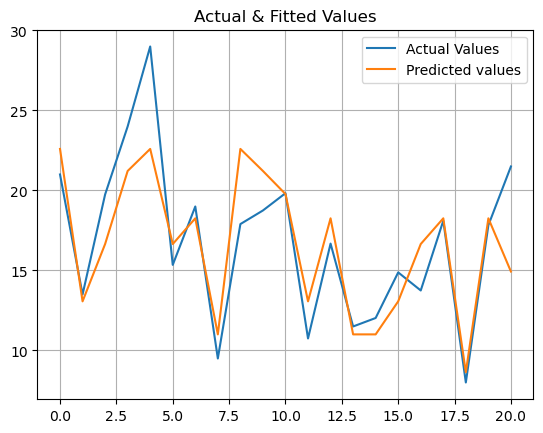

In [41]:
#plot for actual and fitted  values
plt.plot(df["Delivery"],label='Actual Values')
plt.plot(predY,label='Predicted values')
plt.title('Actual & Fitted Values')
legend=plt.legend()
plt.grid(True)
plt.show()

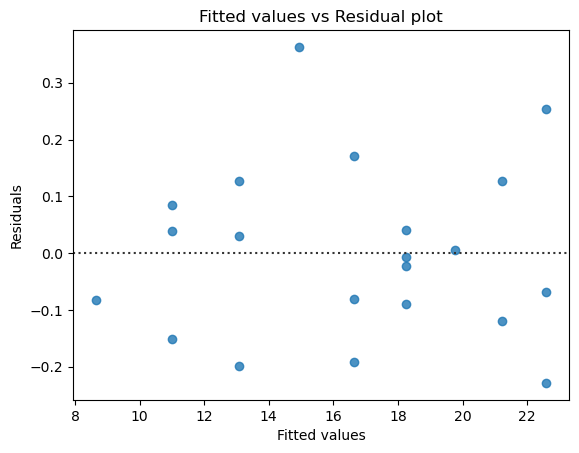

In [42]:
#Residual Vs Fitted Values Plot
sns.residplot(x=predY,y=model3.resid)
plt.title('Fitted values vs Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()